# Dictionnaire de données

## Entité Fourmi

| Nom de la donnée |   Type  | Taille | Contraintes                                        | Description                                      |
| ---------------- | :-----: | :----: | -------------------------------------------------- | ------------------------------------------------ |
| id_fourmi        |   INT   |        | PRIMARY KEY, AUTO_INCREMENT                        | Identifiant unique d’une fourmi                  |
| nom_fourmi       | VARCHAR |   50   | NOT NULL                                           | Nom affiché de la fourmi                         |
| date_naissance   |   DATE  |        |                                                    | Date de naissance de la fourmi                   |
| id_fourmiliere   |   INT   |        | FOREIGN KEY REFERENCES Fourmiliere(id_fourmiliere) | Référence à la fourmilière d’appartenance        |
| role_fourmi      |   ENUM  |        | DEFAULT 'utilisatrice'                             | Rôle (utilisatrice, premium, modératrice, admin) |

## Entité Fourmillière 

| Nom de la donnée |   Type  | Taille | Contraintes                 | Description                          |
| ---------------- | :-----: | :----: | --------------------------- | ------------------------------------ |
| id_fourmiliere   |   INT   |        | PRIMARY KEY, AUTO_INCREMENT | Identifiant unique de la fourmilière |
| nom_fourmiliere  | VARCHAR |   100  | NOT NULL, UNIQUE            | Nom de la fourmilière                |
| description      |   TEXT  |        |                             | Description de la fourmilière        |
| date_creation    |   DATE  |        | DEFAULT CURRENT_DATE        | Date de création de la fourmilière   |

## Entité relation amitié

| Nom de la donnée | Type | Taille | Contraintes                                           | Description                       |
| ---------------- | :--: | :----: | ----------------------------------------------------- | --------------------------------- |
| id_relation      |  INT |        | PRIMARY KEY, AUTO_INCREMENT                           | Identifiant unique de la relation |
| statut_relation  | ENUM |        | CHECK (valeur IN ('en_attente','acceptee','refusee')) | Statut de la demande d’amitié     |
| id_fourmi_1      |  INT |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi)              | Première fourmi impliquée         |
| id_fourmi_2      |  INT |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi)              | Deuxième fourmi impliquée         |

## Entité mentorat

| Nom de la donnée | Type | Taille | Contraintes                              | Description                     |
| ---------------- | :--: | :----: | ---------------------------------------- | ------------------------------- |
| id_mentor        |  INT |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi) | Fourmi jouant le rôle de mentor |
| id_filleule      |  INT |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi) | Fourmi encadrée par le mentor   |

## Entité post

| Nom de la donnée |   Type   | Taille | Contraintes                              | Description                          |
| ---------------- | :------: | :----: | ---------------------------------------- | ------------------------------------ |
| id_post          |    INT   |        | PRIMARY KEY, AUTO_INCREMENT              | Identifiant unique d’un post         |
| contenu_post     |   TEXT   |        | NOT NULL                                 | Contenu textuel du post              |
| date_post        | DATETIME |        | DEFAULT CURRENT_TIMESTAMP                | Date et heure de publication du post |
| id_auteur        |    INT   |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi) | Référence à la fourmi auteur du post |

## Entité commentaire

| Nom de la donnée      | Type | Taille | Contraintes                                                  | Description                              |
| --------------------- | :--: | :----: | ------------------------------------------------------------ | ---------------------------------------- |
| id_commentaire        |  INT |        | PRIMARY KEY, AUTO_INCREMENT                                  | Identifiant unique d’un commentaire      |
| contenu_commentaire   | TEXT |        | NOT NULL                                                     | Contenu textuel du commentaire           |
| id_post               |  INT |        | FOREIGN KEY REFERENCES Post(id_post)                         | Référence au post associé                |
| id_parent_commentaire |  INT |        | NULLABLE, FOREIGN KEY REFERENCES Commentaire(id_commentaire) | Référence au commentaire parent (thread) |
| id_auteur             |  INT |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi)                     | Auteur du commentaire                    |

## Entité abonnement

| Nom de la donnée  | Type | Taille | Contraintes                                    | Description                          |
| ----------------- | :--: | :----: | ---------------------------------------------- | ------------------------------------ |
| id_abonnement     |  INT |        | PRIMARY KEY, AUTO_INCREMENT                    | Identifiant unique d’un abonnement   |
| type_abonnement   | ENUM |        | CHECK (valeur IN ('mensuel','annuel'))         | Type d’abonnement choisi             |
| date_debut        | DATE |        | NOT NULL                                       | Date de début de l’abonnement        |
| date_fin          | DATE |        |                                                | Date de fin de l’abonnement          |
| statut_abonnement | ENUM |        | CHECK (valeur IN ('actif','resilie','expire')) | Statut actuel de l’abonnement        |
| id_fourmi         |  INT |        | FOREIGN KEY REFERENCES Fourmi(id_fourmi)       | Fourmi liée à l’abonnement (premium) |





# Diagramme d'activité

```
flowchart TD </br>
    start([Debut]) --> F1[Fourmi : Quitter la fourmiliere actuelle]
    F1 --> F2[Fourmi : Faire une demande de nouvelle fourmiliere]
    F2 --> M1[Moderatrice : Examiner la demande]
    M1 -->|Acceptee| M2[Moderatrice : Valider la demande]
    M2 --> F3[Fourmi : Integree a la nouvelle fourmiliere]
    F3 --> End([Fin])
    M1 -->|Refusee| M3[Moderatrice : Refuser la demande]
    M3 --> W1[Attente obligatoire de 30 jours]
    W1 --> F2
```

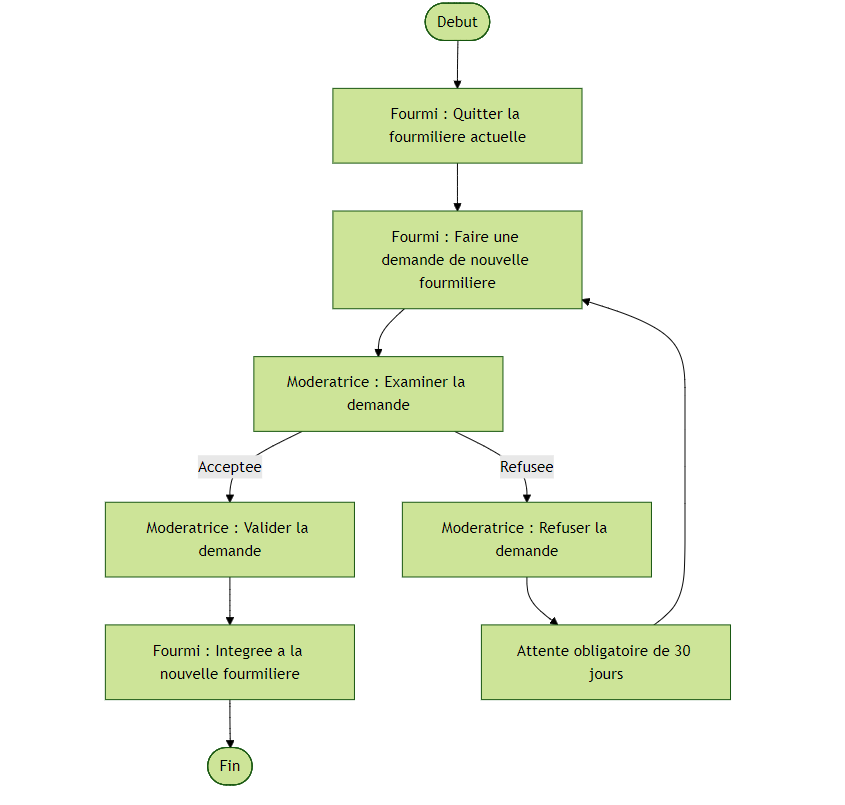

# Diagramme de séquence

## Publier un post premium avec SuperPhéromones

```
sequenceDiagram
    participant FourmiUI
    participant PostController
    participant PremiumService
    participant AlgoService
    participant Database
    FourmiUI->>PostController: Clique sur "Publier avec SuperPhéromones"
    PostController->>PremiumService: Vérifier abonnement premium
    PremiumService-->>PostController: Abonnement actif ?
    alt Abonnement actif
        PostController->>Database: Créer le post
        Database-->>PostController: Post créé
        PostController->>AlgoService: Appliquer boost (x3)
        AlgoService-->>PostController: Boost appliqué
        PostController-->>FourmiUI: Confirmation de publication
    else Abonnement inactif
        PostController-->>FourmiUI: Proposer upgrade
    end
```

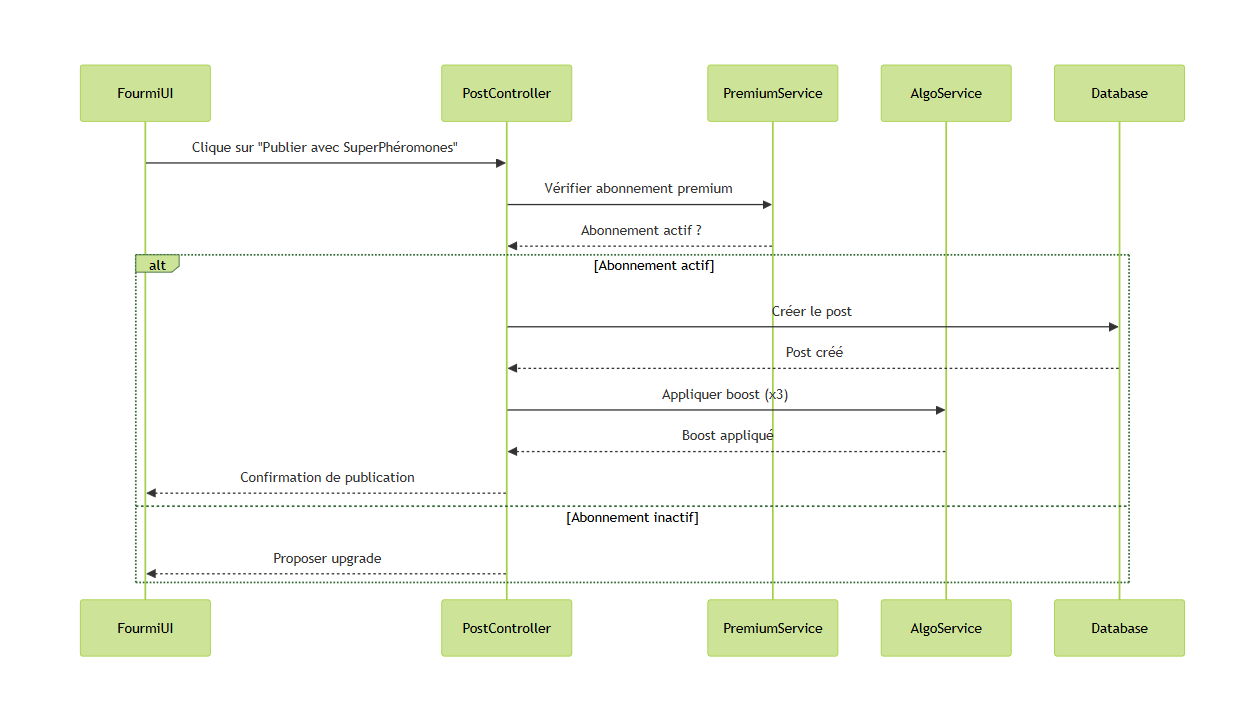

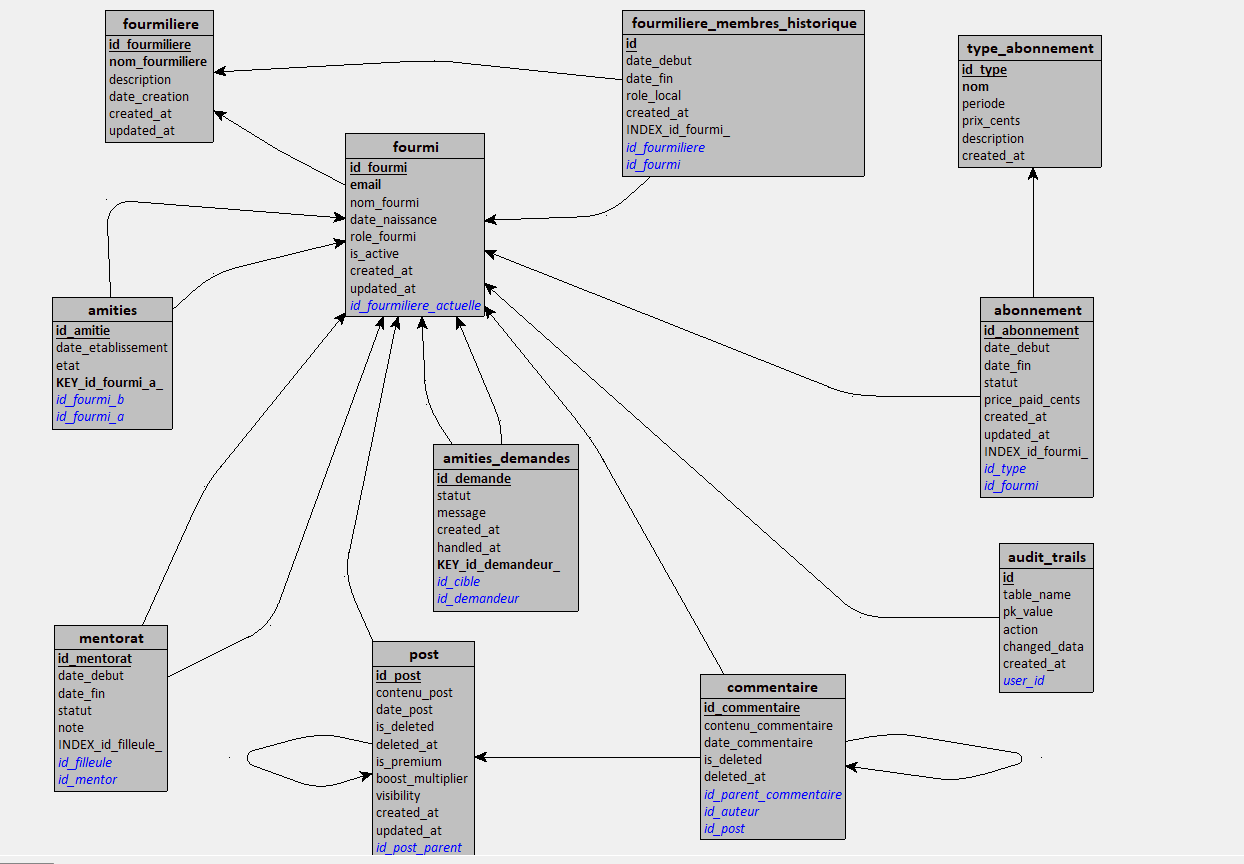

In [ ]:
CREATE TABLE fourmiliere(
   id_fourmiliere INT AUTO_INCREMENT,
   nom_fourmiliere VARCHAR(100)  NOT NULL,
   description TEXT,
   date_creation DATE NOT NULL DEFAULT( ) CURRENT_DATE,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   updated_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
   PRIMARY KEY(id_fourmiliere),
   UNIQUE(nom_fourmiliere)
);

CREATE TABLE fourmi(
   id_fourmi INT AUTO_INCREMENT,
   email VARCHAR(255)  NOT NULL,
   nom_fourmi VARCHAR(50)  NOT NULL,
   date_naissance DATE,
   role_fourmi VARCHAR(20)  NOT NULL DEFAULT 'utilisatrice',
   is_active BOOLEAN NOT NULL DEFAULT TRUE,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   updated_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
   id_fourmiliere_actuelle INT NOT NULL,
   PRIMARY KEY(id_fourmi),
   UNIQUE(email),
   FOREIGN KEY(id_fourmiliere_actuelle) REFERENCES fourmiliere(id_fourmiliere)
);

CREATE TABLE fourmiliere_membres_historique(
   id INT AUTO_INCREMENT,
   date_debut DATE NOT NULL,
   date_fin DATE NULL,
   role_local VARCHAR(50) ,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   INDEX_id_fourmi_ ,
   id_fourmiliere INT NOT NULL,
   id_fourmi INT NOT NULL,
   PRIMARY KEY(id),
   FOREIGN KEY(id_fourmiliere) REFERENCES fourmiliere(id_fourmiliere),
   FOREIGN KEY(id_fourmi) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE type_abonnement(
   id_type INT AUTO_INCREMENT,
   nom VARCHAR(50)  NOT NULL,
   periode VARCHAR(20)  NOT NULL,
   prix_cents INT NOT NULL,
   description TEXT,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   PRIMARY KEY(id_type),
   UNIQUE(nom)
);

CREATE TABLE abonnement(
   id_abonnement INT AUTO_INCREMENT,
   date_debut DATE NOT NULL,
   date_fin DATE NULL,
   statut VARCHAR(20)  NOT NULL DEFAULT 'actif',
   price_paid_cents INT NOT NULL,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   updated_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
   INDEX_id_fourmi_ ,
   id_type INT NOT NULL,
   id_fourmi INT NOT NULL,
   PRIMARY KEY(id_abonnement),
   FOREIGN KEY(id_type) REFERENCES type_abonnement(id_type),
   FOREIGN KEY(id_fourmi) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE audit_trails(
   id INT AUTO_INCREMENT,
   table_name TEXT NOT NULL,
   pk_value TEXT,
   action VARCHAR(20)  NOT NULL,
   changed_data JSON,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   user_id INT,
   PRIMARY KEY(id),
   FOREIGN KEY(user_id) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE amities_demandes(
   id_demande INT AUTO_INCREMENT,
   statut VARCHAR(20)  NOT NULL DEFAULT 'en_attente',
   message TEXT,
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   handled_at DATETIME NULL,
   KEY_id_demandeur_ id_cible),
   id_cible INT NOT NULL,
   id_demandeur INT NOT NULL,
   PRIMARY KEY(id_demande),
   UNIQUE(KEY_id_demandeur_),
   FOREIGN KEY(id_cible) REFERENCES fourmi(id_fourmi),
   FOREIGN KEY(id_demandeur) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE amities(
   id_amitie INT AUTO_INCREMENT,
   date_etablissement DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   etat VARCHAR(20)  NOT NULL DEFAULT 'active',
   KEY_id_fourmi_a_ id_fourmi_b),
   id_fourmi_b INT NOT NULL,
   id_fourmi_a INT NOT NULL,
   PRIMARY KEY(id_amitie),
   UNIQUE(KEY_id_fourmi_a_),
   FOREIGN KEY(id_fourmi_b) REFERENCES fourmi(id_fourmi),
   FOREIGN KEY(id_fourmi_a) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE mentorat(
   id_mentorat INT AUTO_INCREMENT,
   date_debut DATE NOT NULL,
   date_fin DATE NULL,
   statut VARCHAR(20)  NOT NULL DEFAULT 'actif',
   note TEXT,
   INDEX_id_filleule_ ,
   id_filleule INT NOT NULL,
   id_mentor INT NOT NULL,
   PRIMARY KEY(id_mentorat),
   FOREIGN KEY(id_filleule) REFERENCES fourmi(id_fourmi),
   FOREIGN KEY(id_mentor) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE post(
   id_post INT AUTO_INCREMENT,
   contenu_post TEXT NOT NULL,
   date_post DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   is_deleted BOOLEAN NOT NULL DEFAULT FALSE,
   deleted_at DATETIME NULL,
   is_premium BOOLEAN NOT NULL DEFAULT FALSE,
   boost_multiplier DECIMAL(5,2)   NOT NULL DEFAULT 1.00,
   visibility VARCHAR(20)  NOT NULL DEFAULT 'public',
   created_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   updated_at DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
   id_post_parent INT,
   id_auteur INT NOT NULL,
   PRIMARY KEY(id_post),
   FOREIGN KEY(id_post_parent) REFERENCES post(id_post),
   FOREIGN KEY(id_auteur) REFERENCES fourmi(id_fourmi)
);

CREATE TABLE commentaire(
   id_commentaire INT AUTO_INCREMENT,
   contenu_commentaire TEXT NOT NULL,
   date_commentaire DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP,
   is_deleted BOOLEAN NOT NULL DEFAULT FALSE,
   deleted_at DATETIME NULL,
   id_parent_commentaire INT,
   id_auteur INT NOT NULL,
   id_post INT NOT NULL,
   PRIMARY KEY(id_commentaire),
   FOREIGN KEY(id_parent_commentaire) REFERENCES commentaire(id_commentaire),
   FOREIGN KEY(id_auteur) REFERENCES fourmi(id_fourmi),
   FOREIGN KEY(id_post) REFERENCES post(id_post)
);
